This notebook visualizes the exploratory data analysis. 
Specifically the UMAP and PCA plots of the data.

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))

In [2]:
data_set <- "first_time"

In [3]:
input_data_path <- file.path("..","data",data_set)

In [4]:
# set the path to the data to visualize
umap_data_path <- file.path(input_data_path,"umap_embeddings.parquet")
scree_data_path <- file.path(input_data_path,"scree_plot.parquet")

# read the data
umap_data <- arrow::read_parquet(umap_data_path)
scree_data <- arrow::read_parquet(scree_data_path)

In [5]:
head(umap_data)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_BF                                                                                                                 
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_CL488                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.

In [6]:
# map the timepoints to the actual hour timepoint
timepoints <- data.frame(
    reference = c("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17"),
    Metadata_timepoint  = c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,90)
)
# map the timepoints to the main df 
umap_data <- umap_data %>% left_join(timepoints, by = c("Metadata_Time" = "reference"))
umap_data$Metadata_timepoint <- as.numeric(umap_data$Metadata_timepoint)
umap_data$Metadata_timepoint_hours <- paste0(umap_data$Metadata_timepoint, " hours")
head(umap_data)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.

In [7]:
unique(umap_data$Metadata_timepoint_hours)
umap_data$Metadata_timepoint_hours <- factor(umap_data$Metadata_timepoint_hours, levels = c(
    '1 hours',
    '4 hours',
    '7 hours',
    '10 hours',
    '13 hours',
    '16 hours',
    '19 hours',
    '22 hours',
    '25 hours',
    '28 hours',
    '31 hours',
    '34 hours',
    '37 hours',
    '40 hours',
    '43 hours',
    '46 hours',
    '49 hours',
    '90 hours'
)
)

[1] "4 hours"  "7 hours"  "10 hours" "13 hours" "16 hours" "19 hours"
 [7] "22 hours" "31 hours" "34 hours" "40 hours" "46 hours" "49 hours"
[13] "28 hours" "25 hours" "43 hours" "1 hours"  "37 hours" "90 hours"

In [8]:
figure_path <- file.path("..","figures",data_set)
# create the output directory if it does not exist
if (!dir.exists(figure_path)) {
  dir.create(figure_path)
}

In [9]:
head(umap_data)


wells <- unique(umap_data$Metadata_Well)
# sort the wells alphabetically
wells <- sort(wells)

Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
2 Ab1-42 0.4 uM      N11           652                            0002        
3 Ab1-42 0.4 uM      N11           652                            0002        
4 Ab1-42 0.4 uM      N11           652                            0002        
5 Ab1-42 0.4 uM      N11           652                            0002        
6 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
2 Ab1-42              01            NA                 
3 Ab1-42              01            NA                 
4 Ab1-42              01            NA                 
5 Ab1-42              01            NA                 
6 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
2 0.4                      uM                       NA                       ⋯
3 0.4                      uM                       NA                       ⋯
4 0.4                      uM                       NA                       ⋯
5 0.4                      uM                       NA                       ⋯
6 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
4 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
5 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
6 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
2 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
3 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.

In [10]:
print(dim(umap_data))
print(dim(scree_data))

head(umap_data,1)
head(scree_data,1)

[1] 3820888      37
[1] 100   2


Metadata_treatment Metadata_Well Metadata_number_of_singlecells Metadata_FOV
1 Ab1-42 0.4 uM      N11           652                            0002        
  Metadata_treatment1 Metadata_Time Metadata_treatment2
1 Ab1-42              01            NA                 
  Metadata_treatment1_dose Metadata_treatment1_unit Metadata_treatment2_dose ⋯
1 0.4                      uM                       NA                       ⋯
  Metadata_Image_PathName_CL561                                                                                                              
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_DNA                                                                                                                
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Image_PathName_GSDM                                                                                                               
1 /gpfs/alpine1/scratch/mlippincott@xsede.org/pyroptosis_live-cell_timelapse/Wave1_data/2.illumination_correction/illum_directory/W0323_F0002
  Metadata_Nuclei_Location_Center_X Metadata_Nuclei_Location_Center_Y
1 16.93757                          14.57341                         
  Metadata_cells_per_well UMAP0    UMAP1   Metadata_timepoint
1 68519                   3.130884 -1.0858 4                 
  Metadata_timepoint_hours
1 4 hours

Explained Variance Principal Component
1 0.5872091          1

In [11]:
print(dim(umap_data))

# randomly mix the order of the rows to prevent plotting bias and artifacts
umap_data <- umap_data[sample(nrow(umap_data)),]

print(dim(umap_data))


[1] 3820888      37
[1] 3820888      37


In [12]:
unique(umap_data$Metadata_treatment)
umap_data$Metadata_treatment <- factor(umap_data$Metadata_treatment, levels = c(
    'Media',
    'DMSO CTL',
    'no Hoechst',

    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 10 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 3uM',
    'LPS 1 ug/ml + Nigericin 5uM',

    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',

    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',

    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM'
))
unique(umap_data$Metadata_treatment)


[1] "LPS 10 ug/ml"                   "LPS 0.1 ug/ml"                 
 [3] "LPS 1 ug/ml"                    "Thapsigargin 10 uM"            
 [5] "Media"                          "Flagellin 0.1 ug/ml"           
 [7] "LPS 1 ug/ml + Nigericin 0.5uM"  "DMSO CTL"                      
 [9] "H2O2 100 nM"                    "Flagellin 1 ug/ml"             
[11] "Flagellin 10 ug/ml"             "Ab1-42 10 uM"                  
[13] "Ab1-42 0.4 uM"                  "LPS 1 ug/ml + Nigericin 1 uM"  
[15] "Thapsigargin 1 uM"              "Ab1-42 2 uM"                   
[17] "LPS 1 ug/ml + Nigericin 0.1 uM" "LPS 1 ug/ml + ATP 2.5 mM"      
[19] "H2O2 100 uM"                    "Thapsigargin 0.5uM"            
[21] "LPS 1 ug/ml + Nigericin 3uM"    "H2O2 500 uM"                   
[23] "LPS 1 ug/ml + Nigericin 5uM"

[1] LPS 10 ug/ml                   LPS 0.1 ug/ml                 
 [3] LPS 1 ug/ml                    Thapsigargin 10 uM            
 [5] Media                          Flagellin 0.1 ug/ml           
 [7] LPS 1 ug/ml + Nigericin 0.5uM  DMSO CTL                      
 [9] H2O2 100 nM                    Flagellin 1 ug/ml             
[11] Flagellin 10 ug/ml             Ab1-42 10 uM                  
[13] Ab1-42 0.4 uM                  LPS 1 ug/ml + Nigericin 1 uM  
[15] Thapsigargin 1 uM              Ab1-42 2 uM                   
[17] LPS 1 ug/ml + Nigericin 0.1 uM LPS 1 ug/ml + ATP 2.5 mM      
[19] H2O2 100 uM                    Thapsigargin 0.5uM            
[21] LPS 1 ug/ml + Nigericin 3uM    H2O2 500 uM                   
[23] LPS 1 ug/ml + Nigericin 5uM   
24 Levels: Media DMSO CTL no Hoechst LPS 0.1 ug/ml LPS 1 ug/ml ... Ab1-42 10 uM

In [13]:


# 9 colors
# col 1 - 3 hues
# colorgrad1 <- c("white", "grey", "#585858")
colorgrad1 <- colorRampPalette(c("lightgrey", "grey"))(3)
# col 2 - 5 hues color ramp 5 hues
colorgrad2 <- colorRampPalette(c("pink", "darkred"))(11)
# col 3 - 3 hues
colorgrad3 <- colorRampPalette(c("yellow", "brown"))(3)
# col 4 - 3 hues
colorgrad4 <- colorRampPalette(c("lightblue", "darkblue"))(6)
# col 5 - 2 hues
colorgrad5 <- colorRampPalette(c("lightgreen", "darkgreen"))(3)
# col 6 - 3 hues
colorgrad6 <- colorRampPalette(c("purple", "#2e004b"))(3)
# col 7 - 2 hues
colorgrad7 <- colorRampPalette(c("cyan", "darkcyan"))(4)
# col 8 - 2 hues
colorgrad8 <- colorRampPalette(c("#ebb676", "darkorange"))(3)
# col 9 - 3 hues
colorgrad9 <- colorRampPalette(c("magenta", "#833b83"))(3)

In [14]:
# define the colors
colors <- c(
    'Media' = colorgrad1[1],
    'DMSO CTL' = colorgrad1[2],
    'no Hoechst' = colorgrad1[3],

    'LPS 0.1 ug/ml' = colorgrad2[1],
    'LPS 1 ug/ml' = colorgrad2[2],
    'LPS 10 ug/ml' = colorgrad2[3],
    'LPS 1 ug/ml + ATP 2.5 mM' = colorgrad2[4],
    'LPS 1 ug/ml + Nigericin 0.1 uM' = colorgrad2[5],
    'LPS 1 ug/ml + Nigericin 0.5uM' = colorgrad2[6],
    'LPS 1 ug/ml + Nigericin 1 uM' = colorgrad2[7],
    'LPS 1 ug/ml + Nigericin 3uM' = colorgrad2[8],
    'LPS 1 ug/ml + Nigericin 5uM' = colorgrad2[9],

    'Flagellin 0.1 ug/ml' = colorgrad5[1],
    'Flagellin 1 ug/ml' = colorgrad5[2],
    'Flagellin 10 ug/ml' = colorgrad5[3],

    'Thapsigargin 0.5uM' = colorgrad8[1],
    'Thapsigargin 1 uM' = colorgrad8[2],
    'Thapsigargin 10 uM' = colorgrad8[3],
    
    'H2O2 100 nM' = colorgrad7[1],
    'H2O2 100 uM' = colorgrad7[2],
    'H2O2 500 uM' = colorgrad7[3],

    'Ab1-42 0.4 uM' = colorgrad4[1],
    'Ab1-42 2 uM' = colorgrad4[2],
    'Ab1-42 10 uM' = colorgrad4[3]
)

## Scree plot

In [15]:
width <- 8
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
scree_plot <- (
    ggplot(scree_data, aes(x = `Principal Component`, y = `Explained Variance`)) 
    + geom_line() 
    + geom_bar(stat = "identity", fill = "steelblue") 
    + labs(x = "Principal Component", y = "Variance Explained")
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
    )
)
scree_plot_zoom <- scree_plot + xlim(0, 10)
png(file.path(figure_path,"scree_plot.png"), width = width, height = height, units = "in", res = 600)
scree_plot
dev.off()
png(file.path(figure_path,"scree_plot_zoom.png"), width = width, height = height, units = "in", res = 600)
scree_plot_zoom
dev.off()

png 
  2

Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_bar()`).”


png 
  2

Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 91 rows containing missing values or values outside the scale range
(`geom_bar()`).”


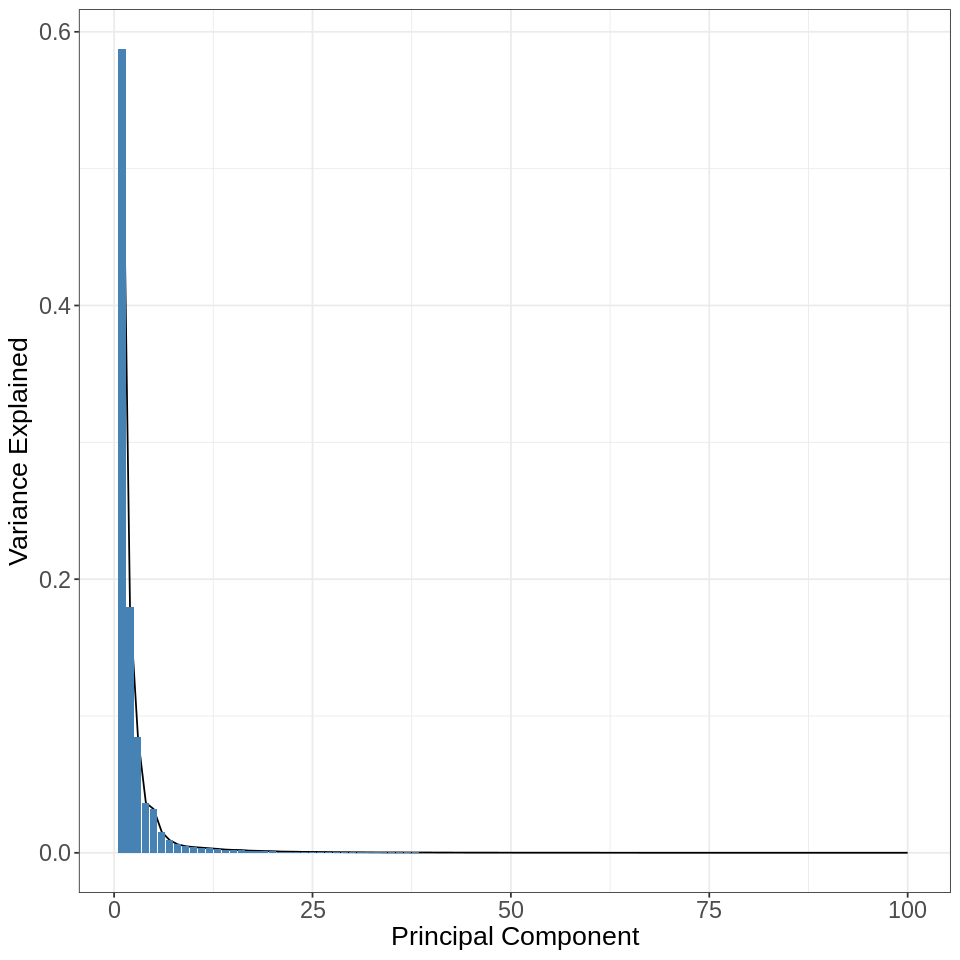

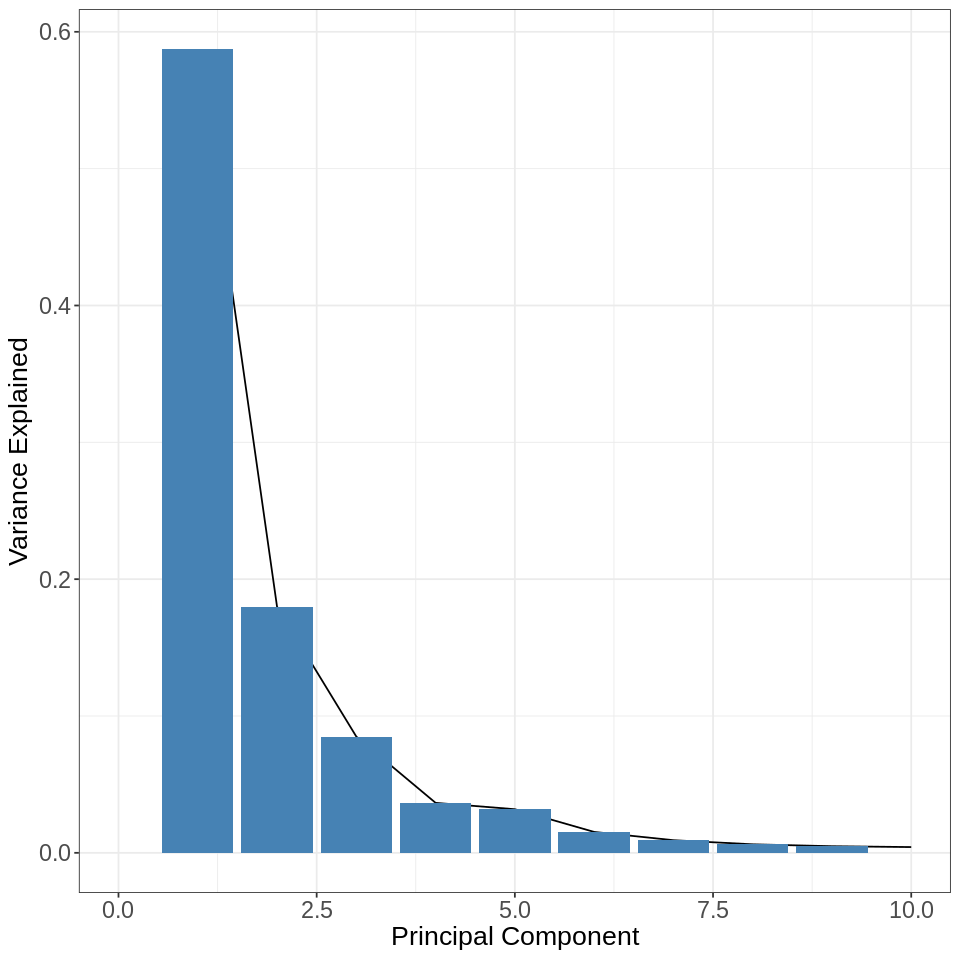

In [16]:
scree_plot
scree_plot_zoom

## UMAP Visualization

png 
  2

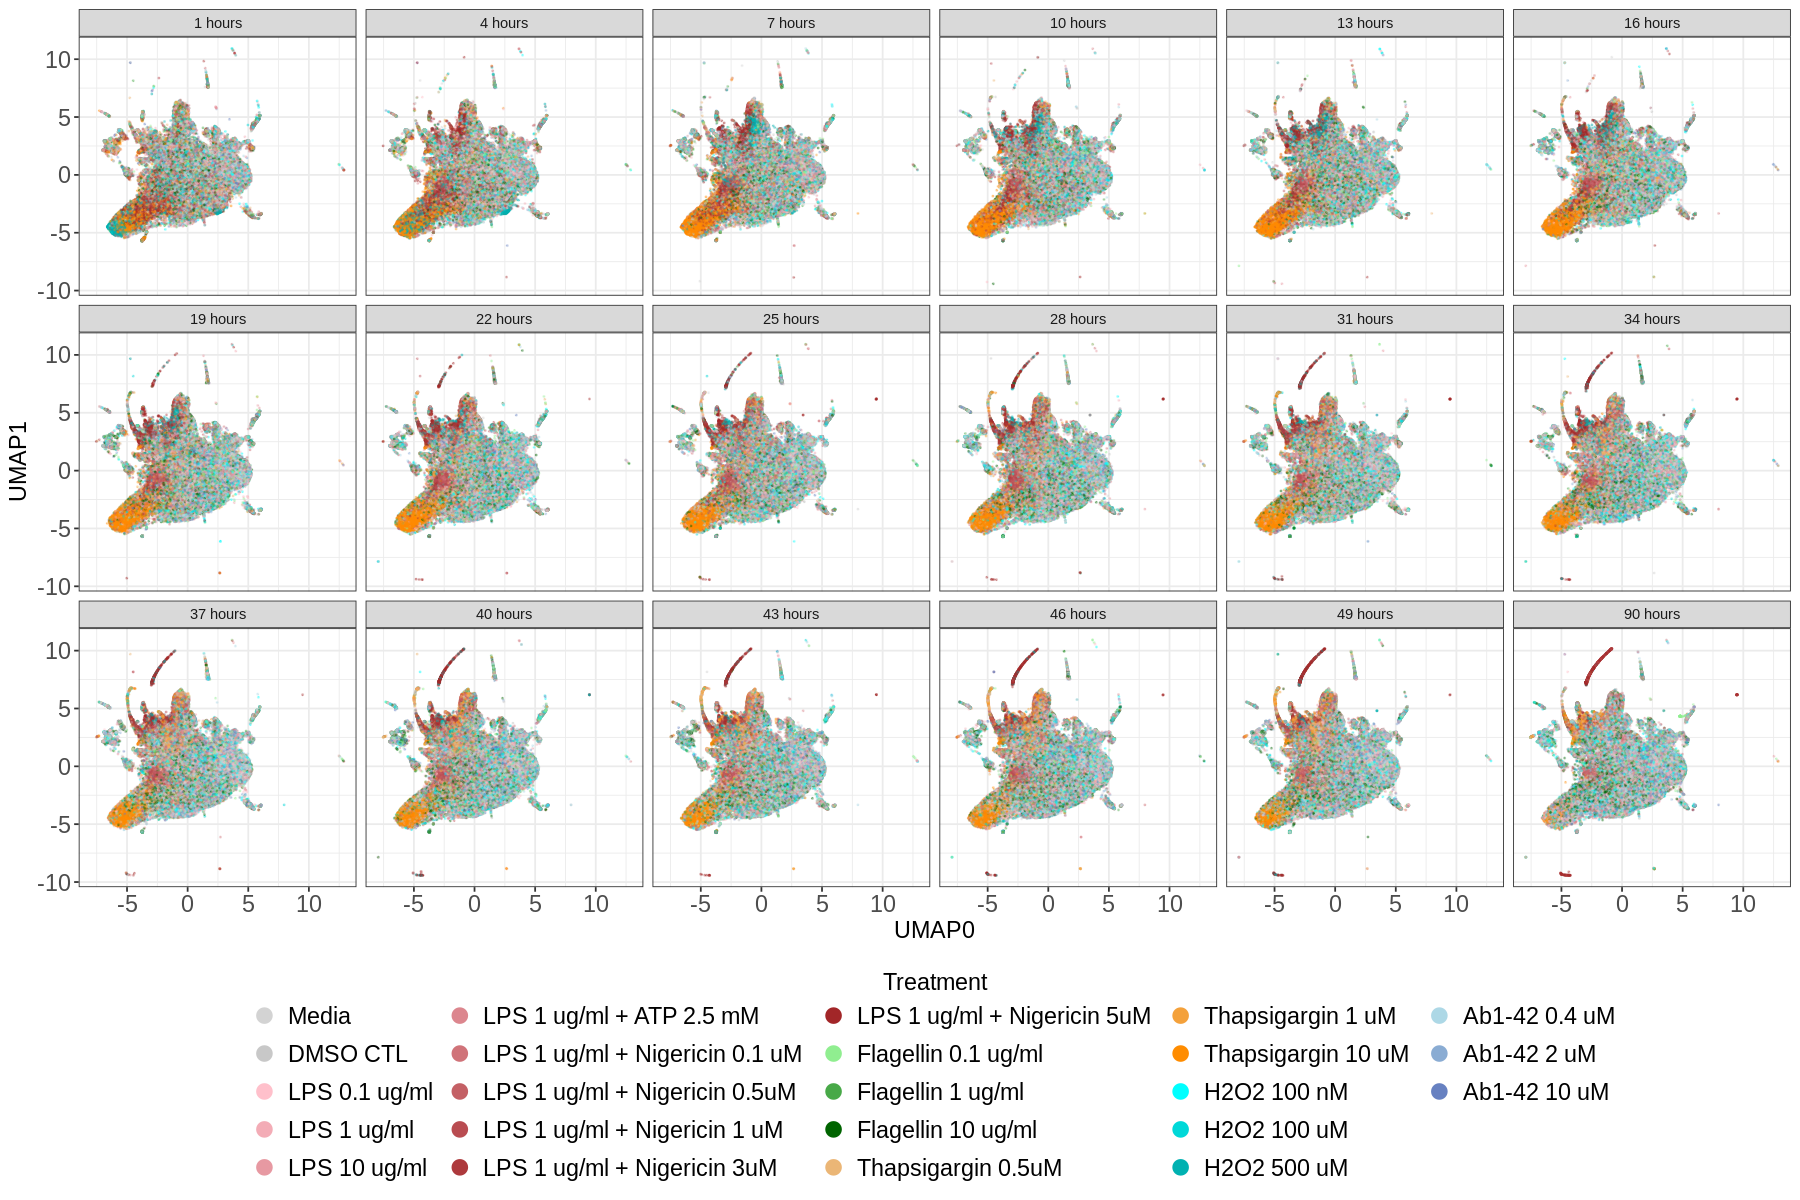

In [17]:
# plot the data
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

umap_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_treatment), size=0.2, alpha=0.3)
    + scale_color_manual(
        values = colors
    )
    # move the legend to the bottom
    + guides(
        color = guide_legend(ncol = 5, title = "Treatment", override.aes = list(size = 4, alpha = 1)),
        # move guide title to top
        title.position = "top",
    )

    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_timepoint_hours, ncol = 6)
)
png(file.path(figure_path,"umap_plot_facet_time.png"), width=width, height=height, units="in", res=600)
umap_plot
dev.off()
umap_plot

In [18]:
# make time a float
umap_data$Metadata_Time <- as.numeric(as.character(umap_data$Metadata_Time))

png 
  2

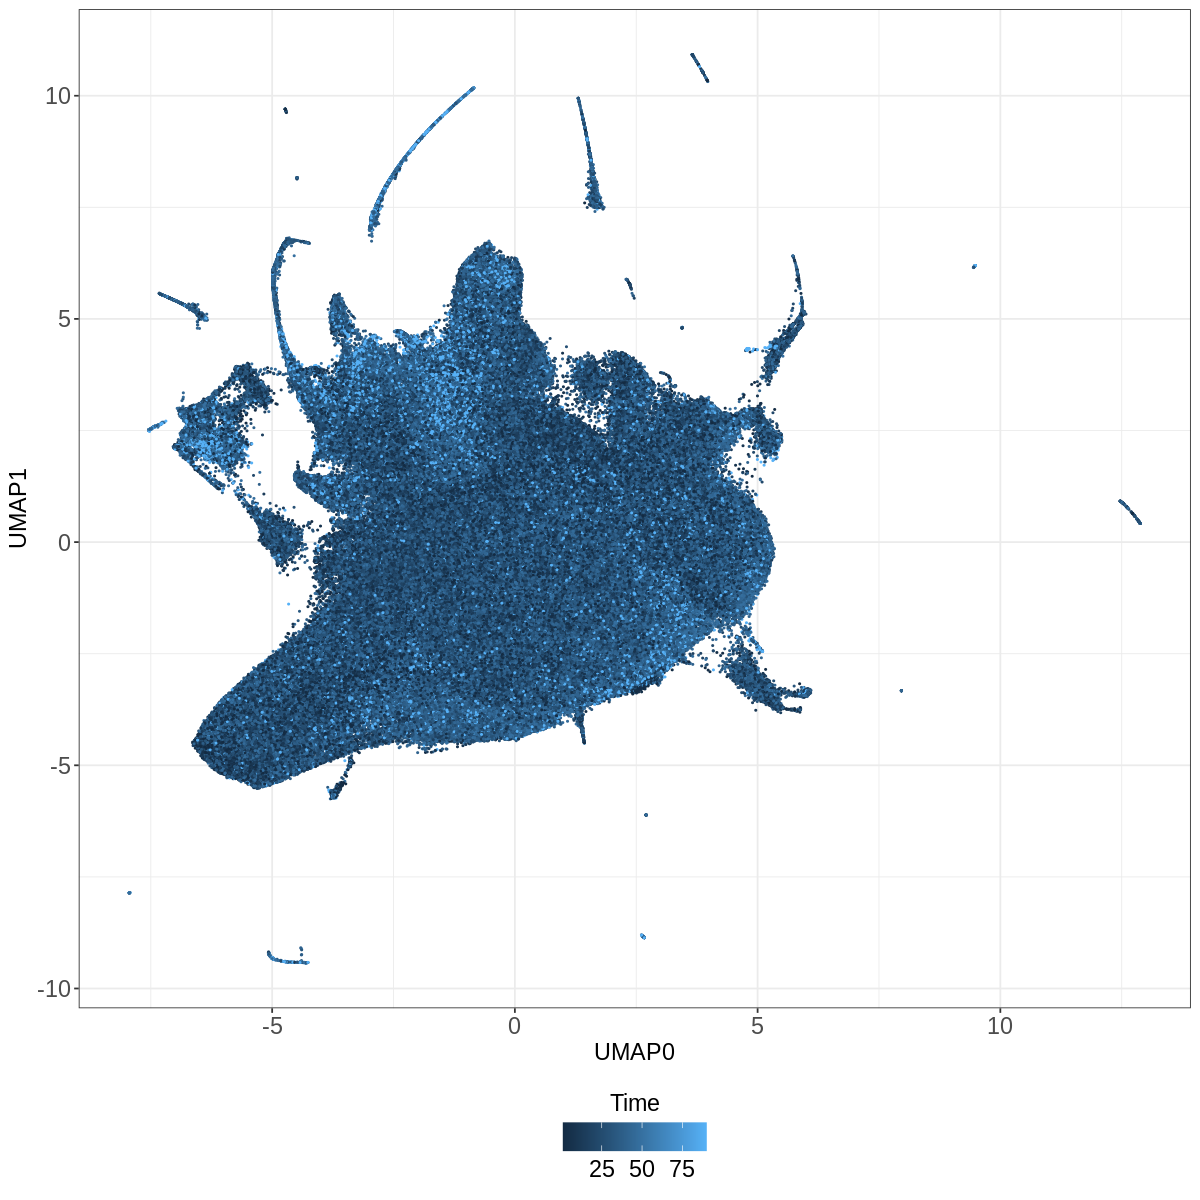

In [19]:
height <- 10
width <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_all_time_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=0.2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_all_time_plot_col_by_treatment.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot
dev.off()
umap_all_time_plot

png 
  2

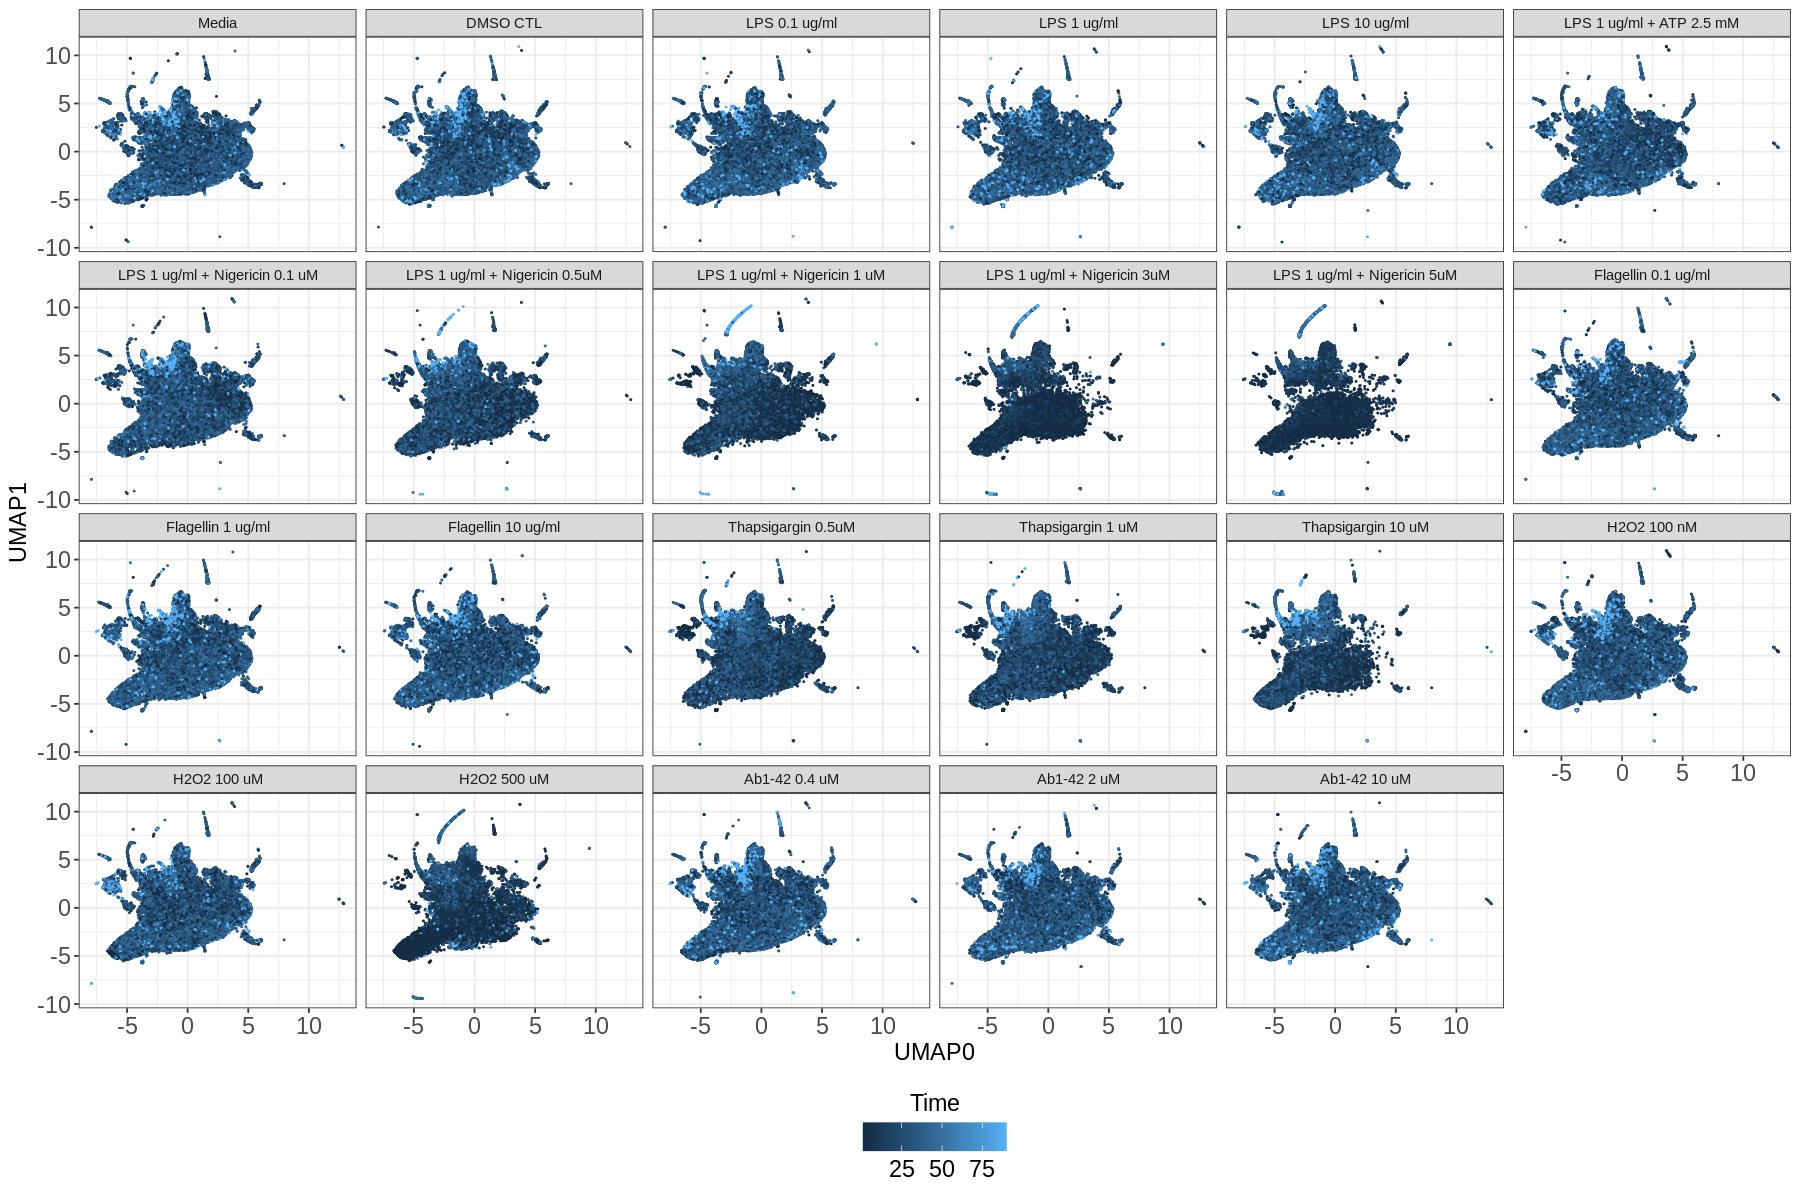

In [20]:
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_all_time_plot_facet <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=0.2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_treatment, ncol = 6)
)
png(file.path(figure_path,"umap_all_time_plot_facet.png"), width=width, height=height, units="in", res=600)
umap_all_time_plot_facet
dev.off()
umap_all_time_plot_facet

## Serum viz

png 
  2

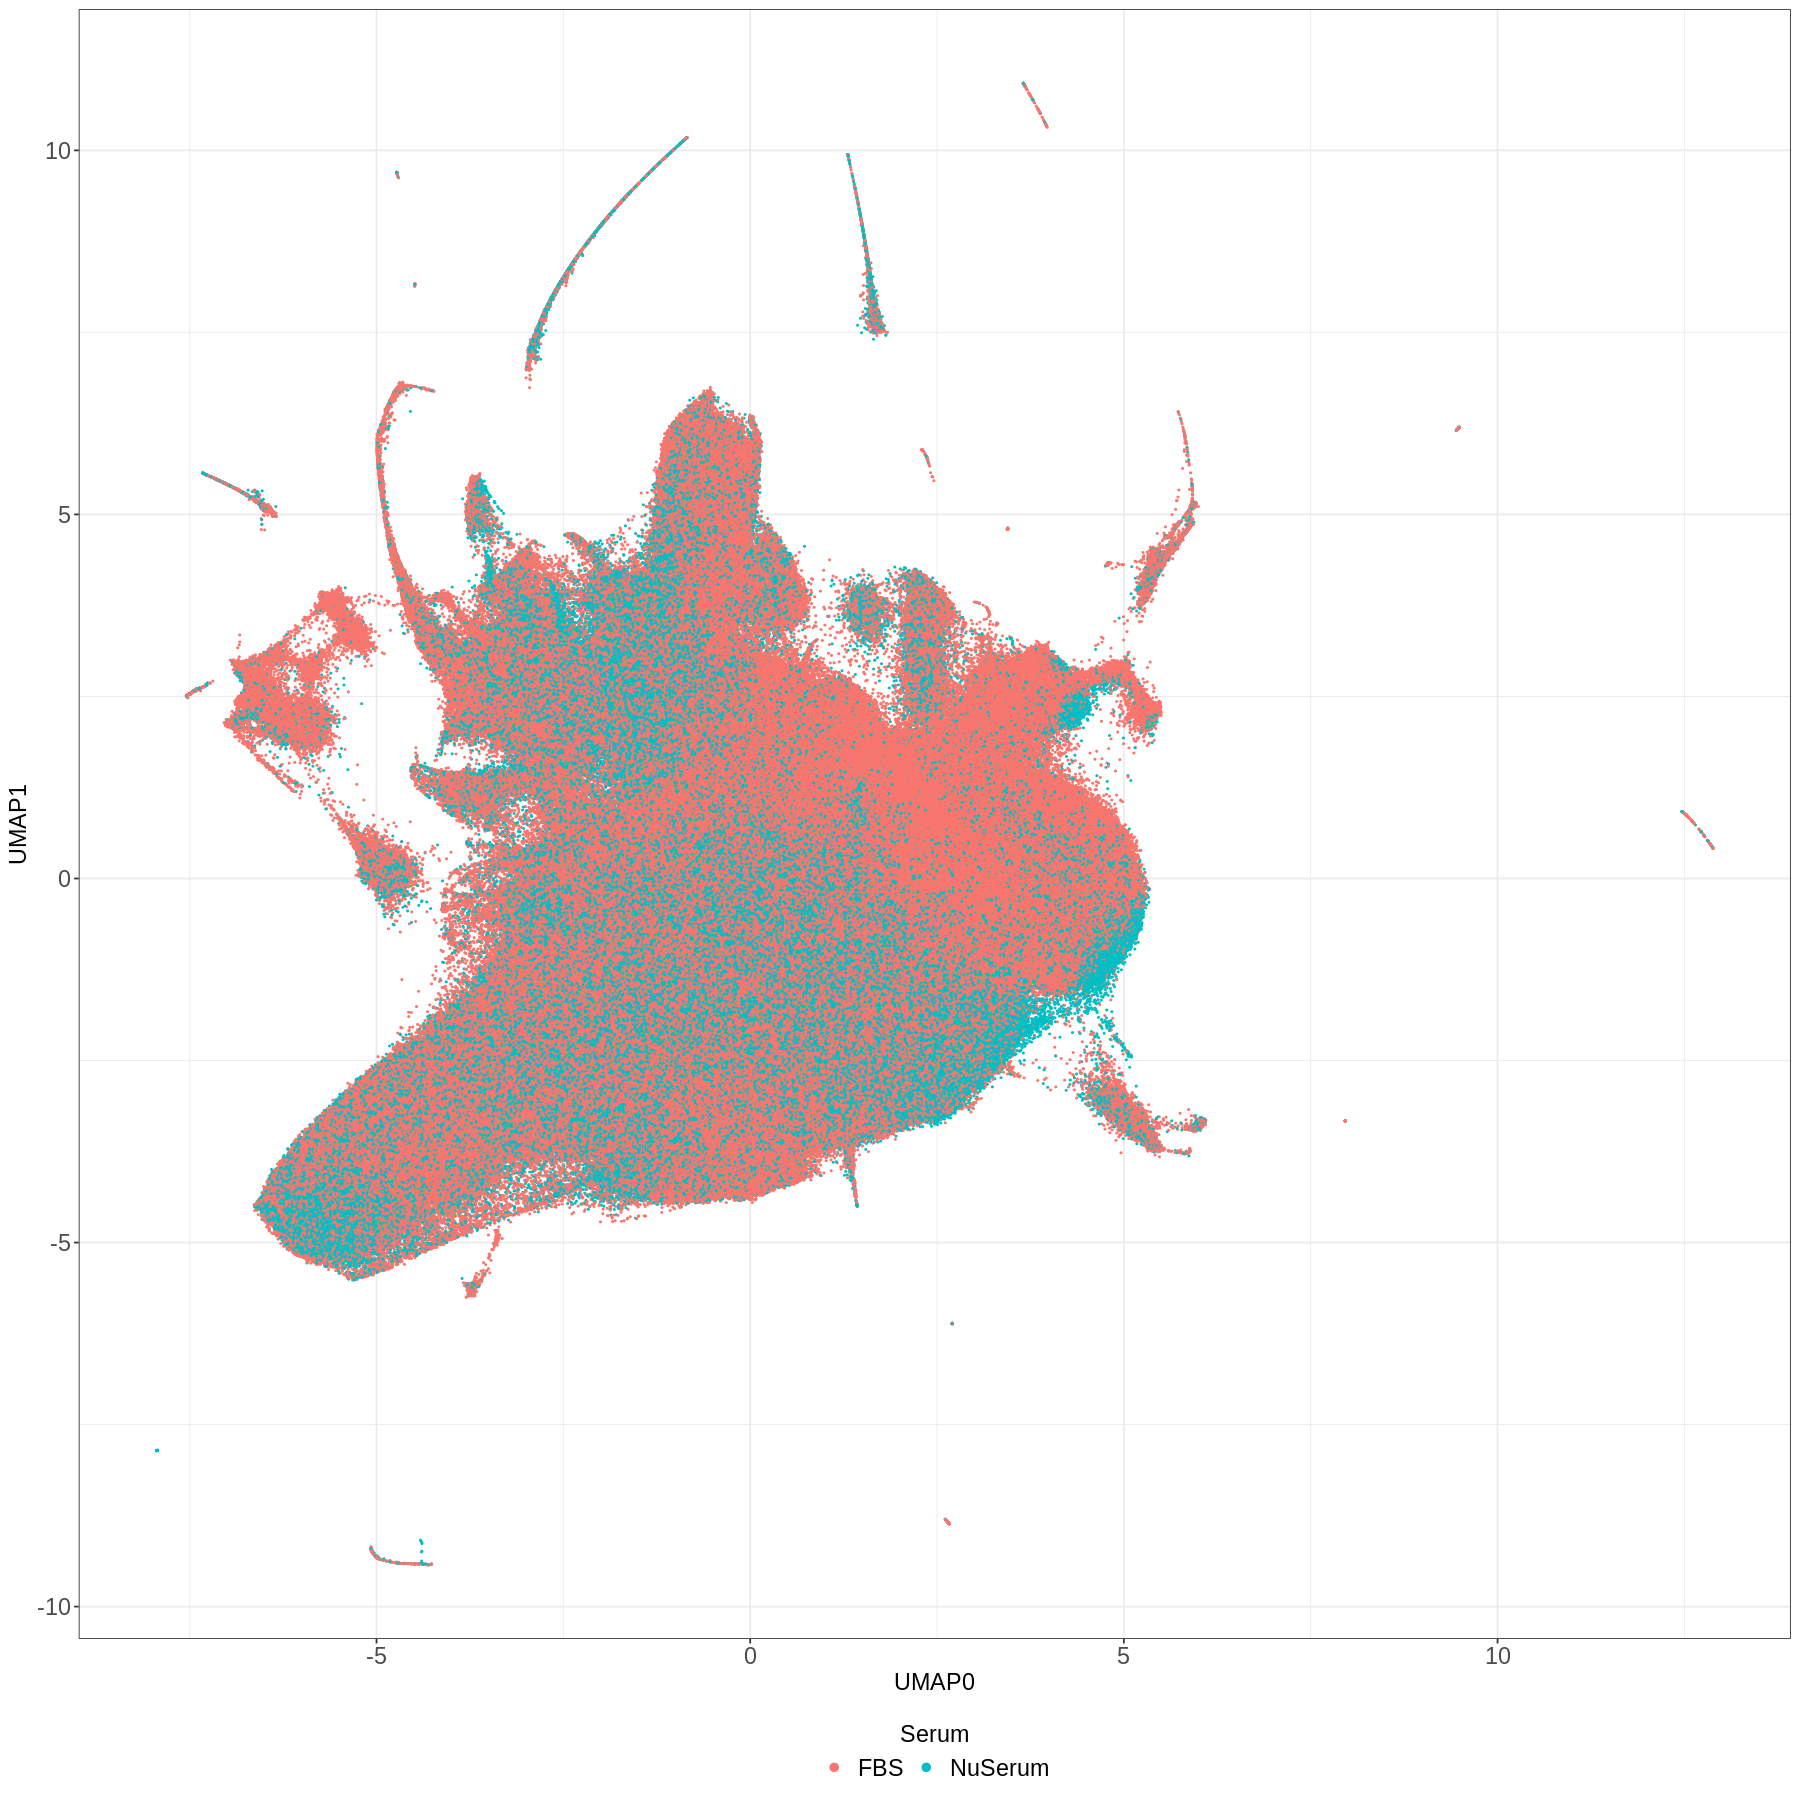

In [21]:
width <- 15
height <- 15
options(repr.plot.width=width, repr.plot.height=height)
umap_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_serum), size=0.2)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
)
png(file.path(figure_path,"umap_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_serum_plot
dev.off()
umap_serum_plot

png 
  2

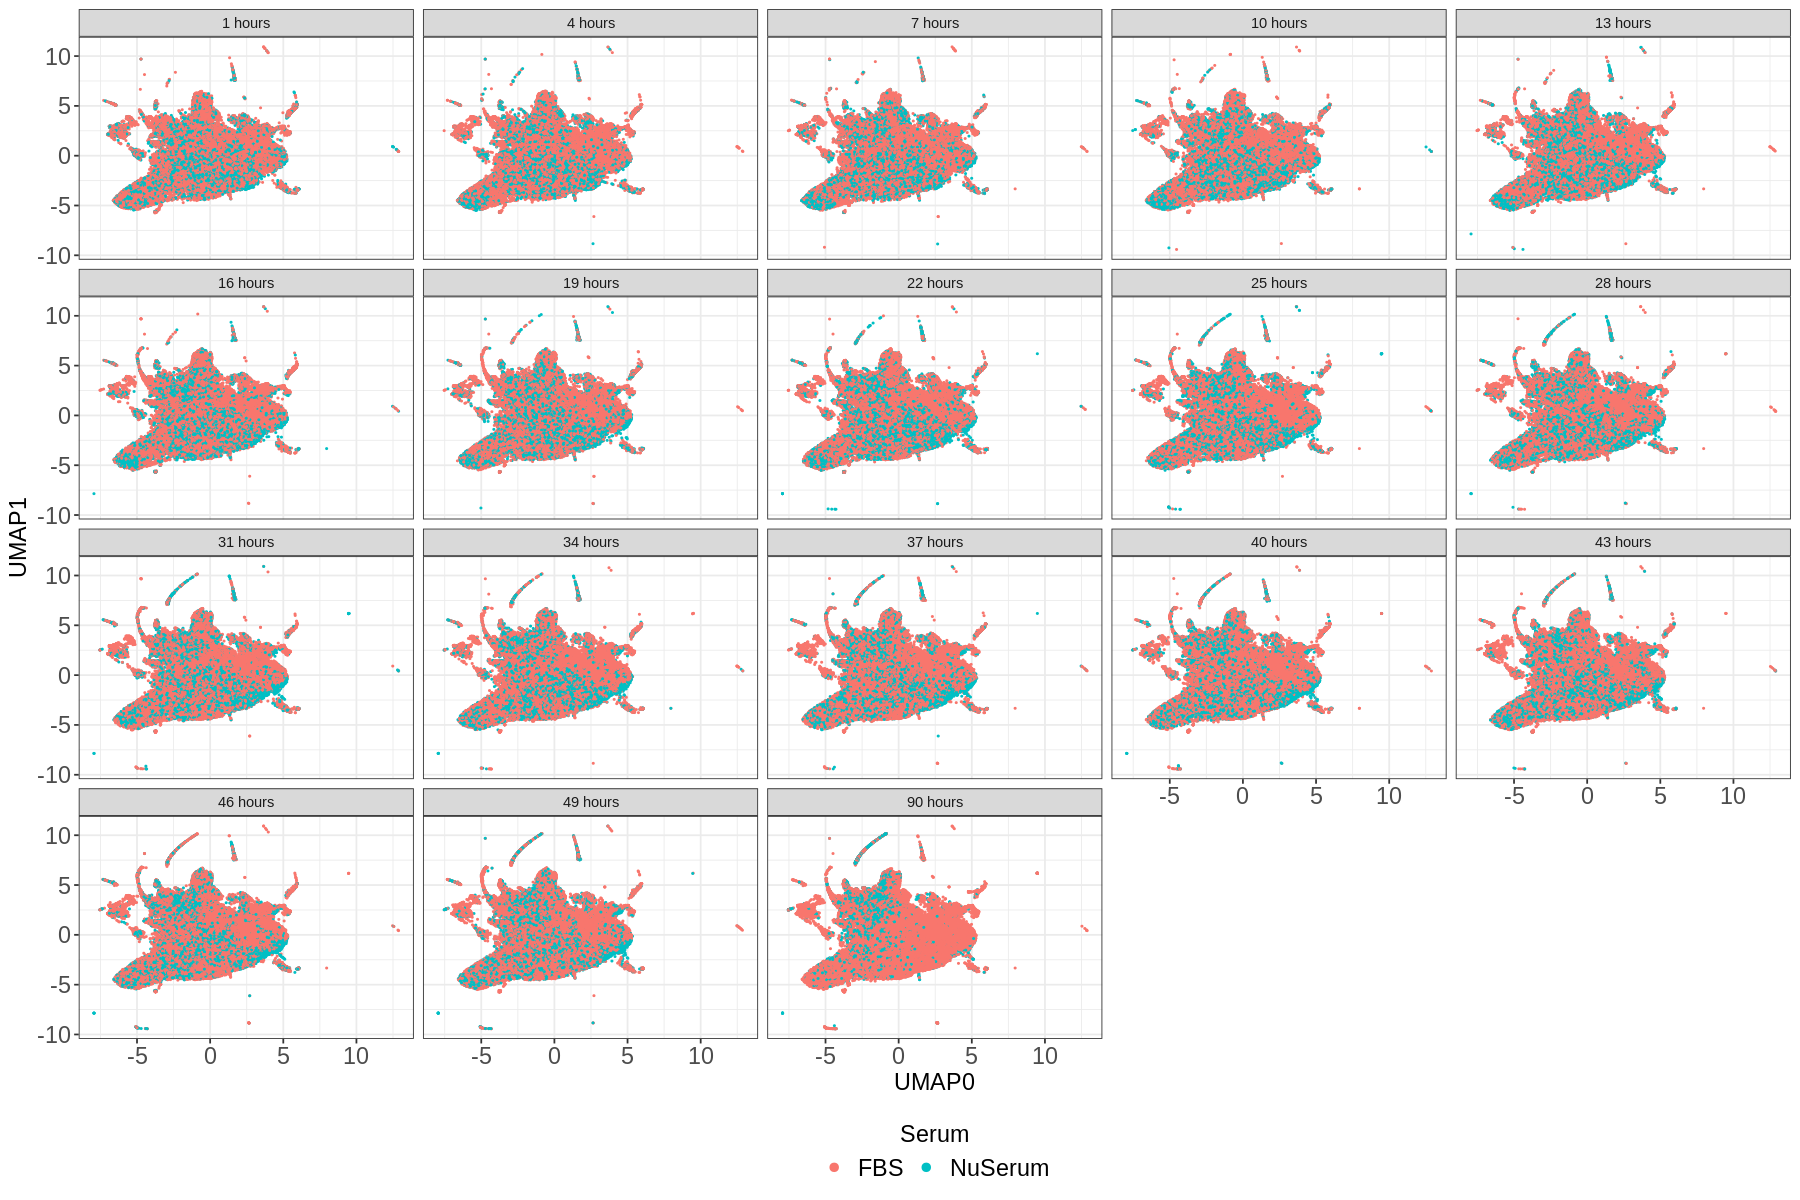

In [22]:
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_over_time_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_serum), size=0.2)
    # move the legend to the bottom
    + guides(
        color = guide_legend(nrow = 1, title = "Serum", override.aes = list(size = 2)),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_timepoint_hours)
)
png(file.path(figure_path,"umap_over_time_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_over_time_serum_plot
dev.off()
umap_over_time_serum_plot

png 
  2

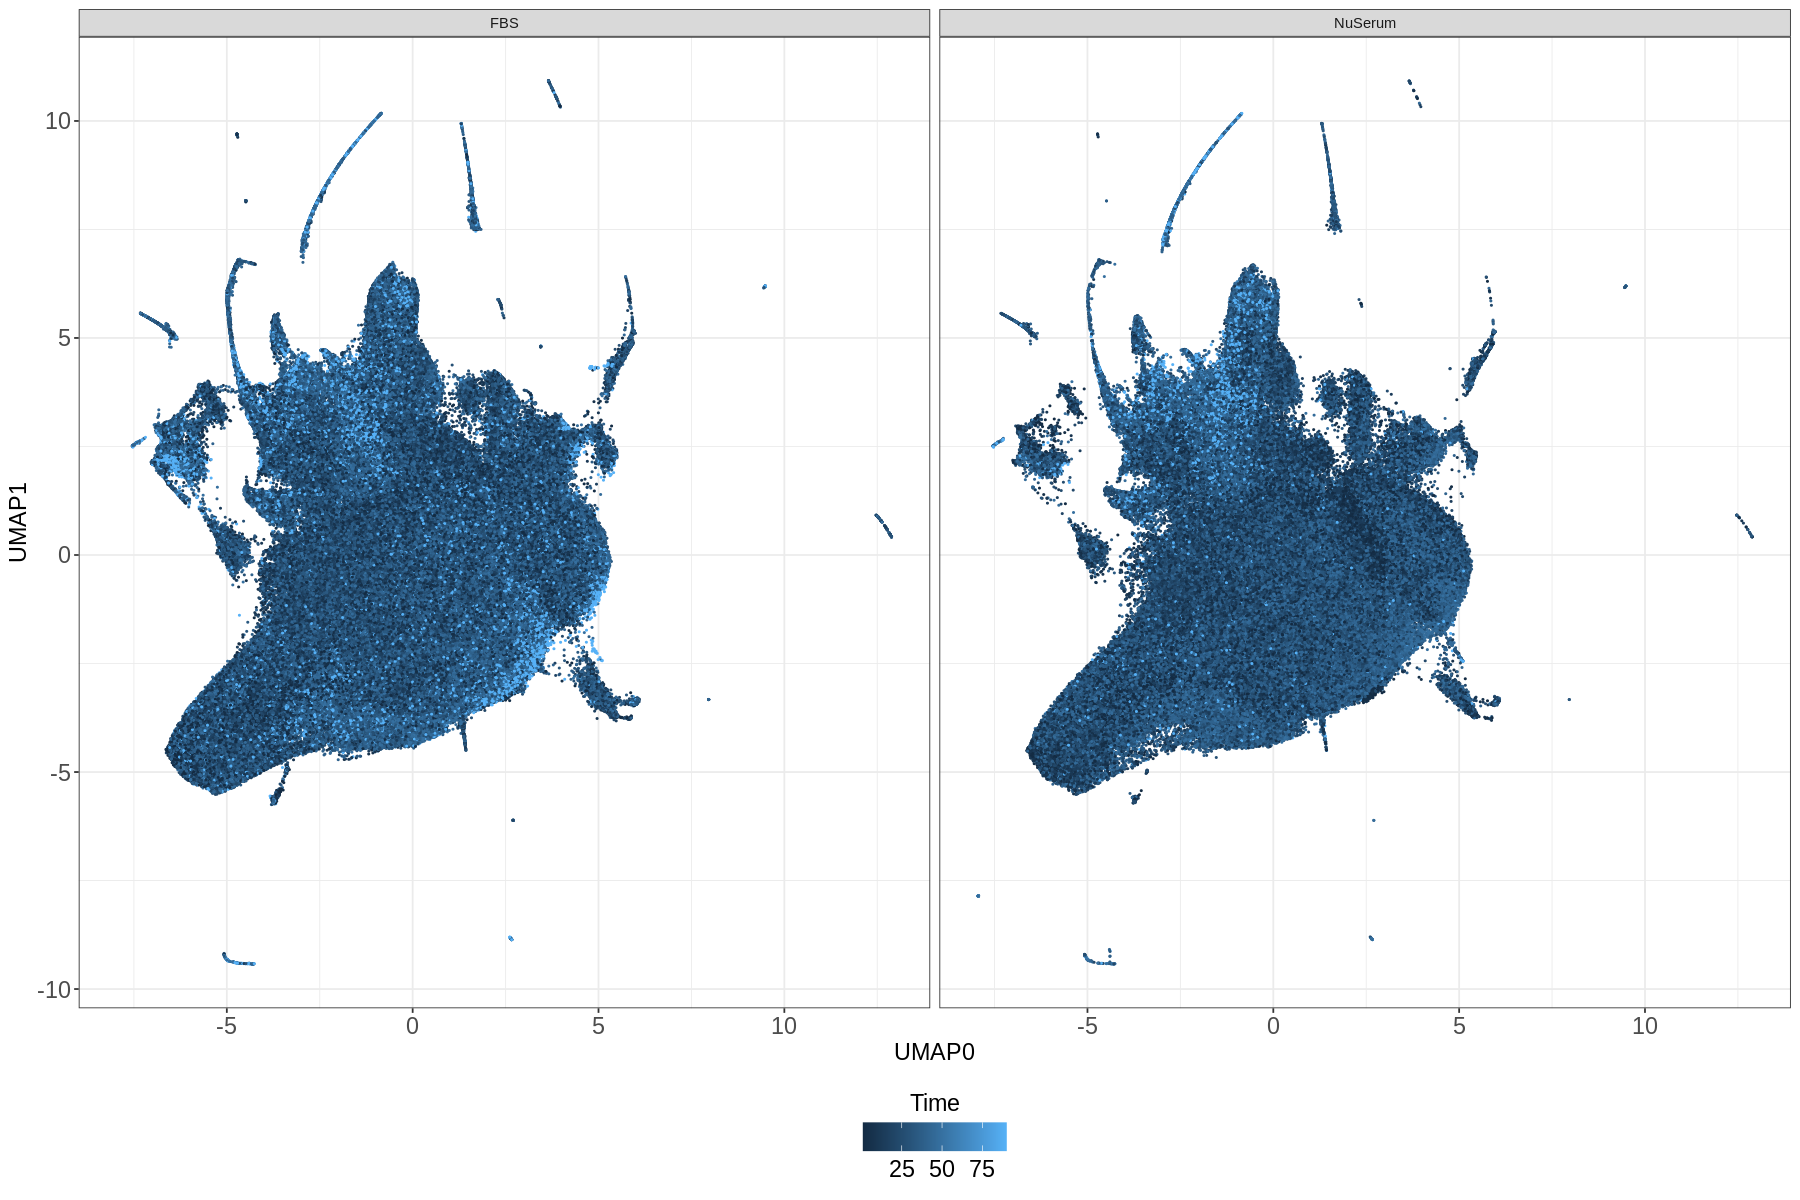

In [23]:
width <- 15
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
umap_time_serum_plot <- (
    ggplot(umap_data, aes(x=UMAP0, y=UMAP1)) 
    + geom_point(aes(color=Metadata_timepoint), size=0.2)
    # move the legend to the bottom
    + guides(
        # make the legend a continuous color scale
        color = guide_colorbar(title = "Time"),
        # move guide title to top
        title.position = "top",
        # change size of dots in legend
        override.aes = list(size = 2)
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14, hjust=0.5),
        legend.position="bottom",
        legend.title.position="top"
    )
    + facet_wrap(~Metadata_serum)
)
png(file.path(figure_path,"umap_time_serum_plot.png"), width=width, height=height, units="in", res=600)
umap_time_serum_plot
dev.off()
umap_time_serum_plot